# **Heart Disease Prediction**

### **ML Algorithms: LR, RF, DT, NB, SVM, GB, MLP, KNN, XGBoost**

### **Import Libraries**

In [ ]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


**Info Of Dataset**

In [ ]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [ ]:
correlation=df.corr()
# correlation

<Axes: >

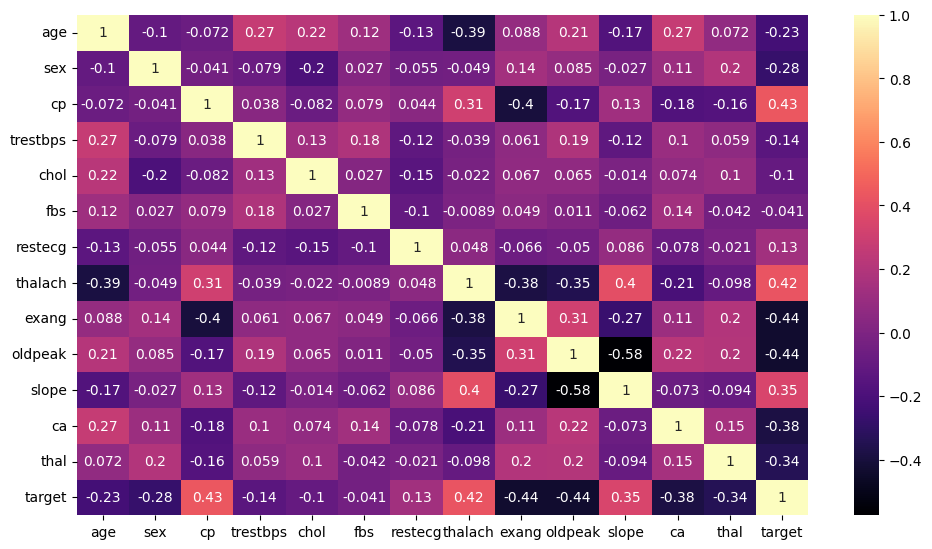

In [ ]:
#heatmap
plt.figure(figsize=(11.8,6.5))
sns.heatmap(correlation, cmap="magma", annot=True)

In [ ]:
# gender_variable = 'sex'

# # Calculate the number of male patients
# male_patients = df[df[gender_variable] == 1].shape[0]
# female_patients = df[df[gender_variable] == 0].shape[0]
# print(f'Number of male patients: {male_patients}')
# print(f'Number of female patients: {female_patients}')


# target_variable = 'target'
# healthy_patients = df[df[target_variable] == 0].shape[0]
# print(f'Number of healthy patients: {healthy_patients}')
# disease = 1025 - healthy_patients
# print(f'Number of unhealhty: {disease}')



# # Calculate the number of male healthy patients
# male_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 1)].shape[0]
# print(f'Number of male healthy patients: {male_healthy_patients}')

# # Calculate the number of female healthy patients
# female_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 0)].shape[0]
# print(f'Number of female healthy patients: {female_healthy_patients}')


# # Unhealthy patient male
# male_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 1)].shape[0]
# print(f'Male unhealthy (having heart disease) patients: {male_unhealthy_patients}')


# # Calculate the number of female unhealthy patients
# female_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 0)].shape[0]
# print(f'Female unhealthy (having heart disease) patients: {female_unhealthy_patients}')

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# target_variable = 'target'

# # Assuming the gender variable is named 'gender' where 1 represents male
# gender_variable = 'sex'

# # Create a count plot to visualize the distribution of individuals with and without heart disease based on gender
# plt.figure(figsize=(7.5, 5.8))
# sns.countplot(x=gender_variable, hue=target_variable, data=df, palette='magma')
# plt.xlabel('Target Attribute: Gender (1: Male, 0: Female)')
# plt.ylabel('Count')
# plt.legend( labels=['No Heart Disease', 'Heart Disease'])
# plt.show()


In [ ]:
# normal attribute and class attribute feature alada korar jonno
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y = df.iloc[:,13]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
# One will use for train and one will use for testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1 ,random_state= 1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (922, 13) (103, 13)


In [ ]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

**RF**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [ ]:
rf_pred = rf_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.9514563106796117
Random Forest Precision: 0.9122807017543859
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9541284403669724
Random Forest Confusion Matrix: [[46  5]
 [ 0 52]]


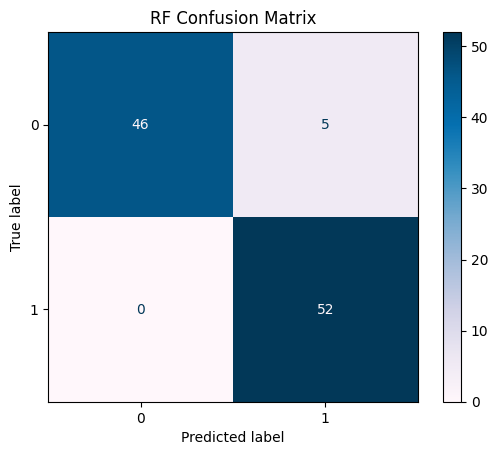

In [ ]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

**DT**

In [ ]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
dc_pred = dc_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.9029126213592233
Decision Tree Precision: 0.85
Decision Tree Recall: 0.9807692307692307
Decision Tree F1 Score: 0.9107142857142857
Decision Tree Confusion Matrix: [[42  9]
 [ 1 51]]


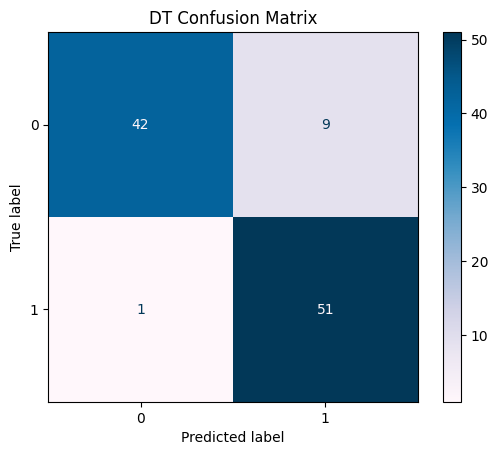

In [ ]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

**NB**

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred = nb_clf.predict(x_test)

In [ ]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.8058252427184466
Naive Bayes Precision: 0.7580645161290323
Naive Bayes Recall: 0.9038461538461539
Naive Bayes F1 Score: 0.8245614035087719
Naive Bayes Confusion Matrix: [[36 15]
 [ 5 47]]


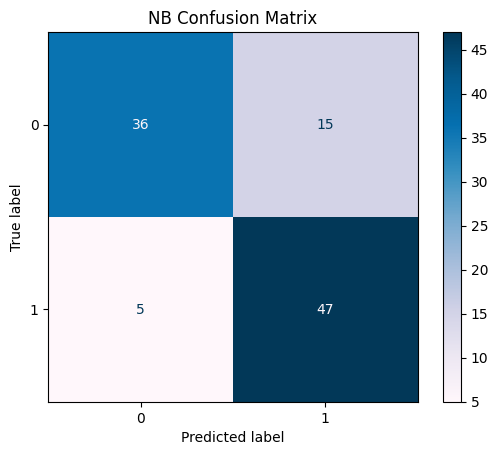

In [ ]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

**Logistic Regression**

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
# ans=model.predict(x_train)
# accuracy=accuracy_score(ans,y_train)
# precision=precision_score(ans,y_train)
# recall=recall_score(ans,y_train)
# f1=f1_score(ans,y_train)

In [ ]:
# print("Training Accuracy is ",accuracy)
# print("Training Precisiom is ",precision)
# print("Training recall is ",recall)
# print("Training F1 is ",f1)

In [ ]:
anss=model.predict(x_test)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)
print("LR Confusion Matrix:",confusion_matrix(anss,y_test))

# print("LR Accuracy:",accuracy_score(y_test,anss))
# print("LR Precision:",precision_score(y_test,anss))
# print("LR Recall:",recall_score(y_test,anss))
# print("LR F1 Score:",f1_score(y_test,anss))
# print("LR Confusion Matrix:",confusion_matrix(y_test,anss))

Testing Accuracy is  0.8446601941747572
Testing Precision is  0.9230769230769231
Testing recall is  0.8
Testing F1 is  0.8571428571428571
LR Confusion Matrix: [[39  4]
 [12 48]]


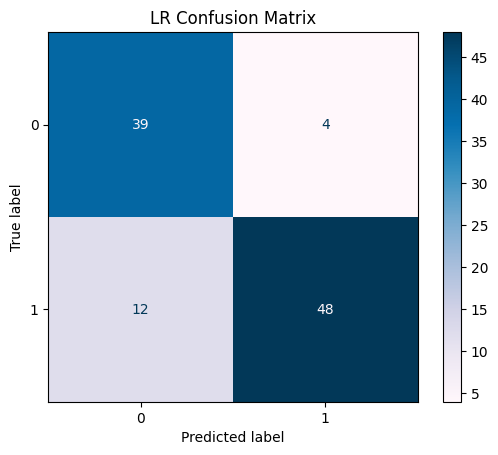

In [ ]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('LR Confusion Matrix')
plt.show()

**XGBoost**

In [ ]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:04:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# acc = model2.predict(x_train)
# accuracy_xgb=accuracy_score(acc,y_train)
# precision_xgb=precision_score(acc,y_train)
# recall_xgb=recall_score(acc,y_train)
# f1_xgb=f1_score(acc,y_train)

# print("Training Accuracy is ",accuracy_xgb)
# print("Training Precision is ",precision_xgb)
# print("Training recall is ",recall_xgb)
# print("Training F1 is ",f1_xgb)

In [ ]:
acc2 = model2.predict(x_test)

In [ ]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))

# print("xgb Accuracy:",accuracy_score(y_test,acc2))
# print("xgb Precision:",precision_score(y_test,acc2))
# print("xgb Recall:",recall_score(y_test,acc2))
# print("xgb F1 Score:",f1_score(y_test,acc2))
# print("xgb Confusion Matrix:",confusion_matrix(y_test,acc2))

Testing Accuracy is  0.9514563106796117
Testing Precision is  0.9807692307692307
Testing recall is  0.9272727272727272
Testing F1 is  0.9532710280373831
xgb Confusion Matrix: [[47  1]
 [ 4 51]]


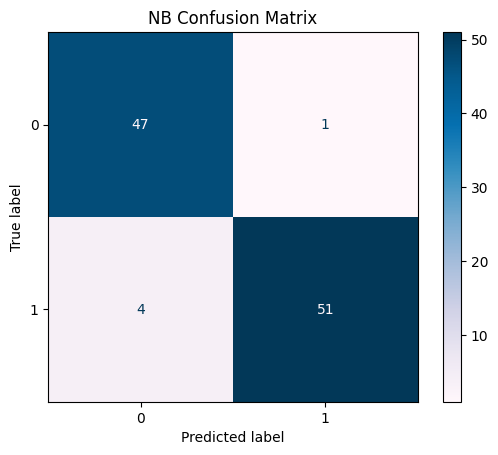

In [ ]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

# MLPClassifier

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [ ]:
# y_pred = model3.predict(x_train)
# acc_mlp  = accuracy_score(y_pred,y_train)
# precision_mlp=precision_score(y_pred,y_train)
# recall_mlp=recall_score(y_pred,y_train)
# f1_mlp=f1_score(y_pred,y_train)
# print("Traing Accuracy is ",acc_mlp)
# print("Traing Precision is ",precision_mlp)
# print("Traing recall is ",recall_mlp)
# print("Traing F1 is ",f1_mlp)

In [ ]:
y_pred_t = model3.predict(x_test)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)


Testing Accuracy is  0.9514563106796117
Testing Precision is  0.9807692307692307
Testing recall is  0.9272727272727272
Testing F1 is  0.9532710280373831
MLP Confusion Matrix [[47  1]
 [ 4 51]]


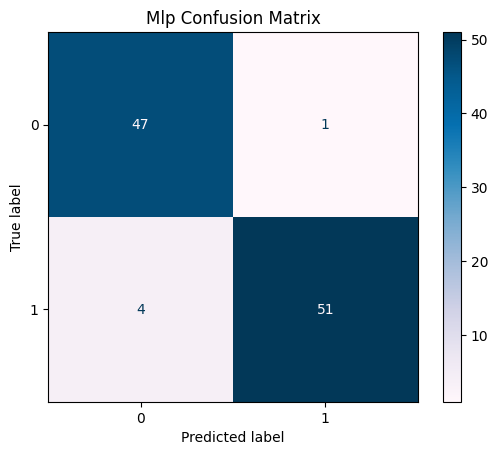

In [ ]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Mlp Confusion Matrix')
plt.show()

**SVM**

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(x_train,y_train)

Y_predict = classifier.predict(x_test)

In [ ]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

SVM Accuracy: 0.8349514563106796
SVM Precision: 0.7692307692307693
SVM Forest Recall: 0.9615384615384616
SVM Forest F1 Score: 0.8547008547008548
SVM Confusion Matrix: [[36 15]
 [ 2 50]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

array([[36, 15],
       [ 2, 50]])

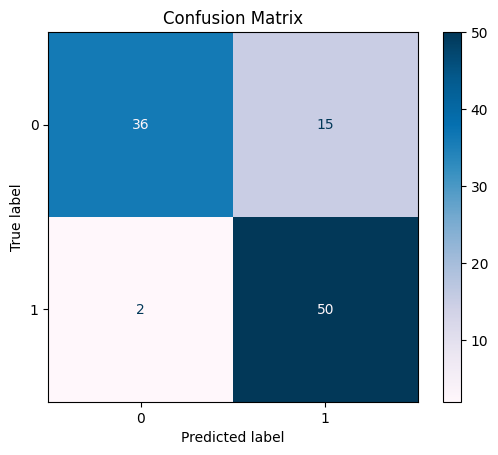

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# KNN


In [ ]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

KNN Accuracy: 0.9029126213592233
KNN Precision: 0.875
KNN Recall: 0.9423076923076923
KNN F1 Score: 0.9074074074074073
KNN Confusion matrix: [[44  7]
 [ 3 49]]


In [ ]:
#when k = 6

# knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
# knn_classifier.fit(x_train,y_train)

# #prediction
# Y_pred = knn_classifier.predict(x_test)

# print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
# print("KNN Precision:",precision_score(y_test,Y_pred))
# print("KNN Forest Recall:",recall_score(y_test,Y_pred))
# print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
# When k= 7

# knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
# knn_classifier.fit(x_train,y_train)
# #prediction
# Y_pred = knn_classifier.predict(x_test)
# print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
# print("KNN Precision:",precision_score(y_test,Y_pred))
# print("KNN Forest Recall:",recall_score(y_test,Y_pred))
# print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
#When k= 8


# knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
# knn_classifier.fit(x_train,y_train)

# #prediction
# Y_pred = knn_classifier.predict(x_test)

# #check accuracy

# print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
# print("KNN Precision:",precision_score(y_test,Y_pred))
# print("KNN Forest Recall:",recall_score(y_test,Y_pred))
# print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
# When k = 9


# knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
# knn_classifier.fit(x_train,y_train)

# #prediction
# Y_pred = knn_classifier.predict(x_test)

In [ ]:
# print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
# print("KNN Precision:",precision_score(y_test,Y_pred))
# print("KNN Forest Recall:",recall_score(y_test,Y_pred))
# print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


In [ ]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

array([[44,  7],
       [ 3, 49]])

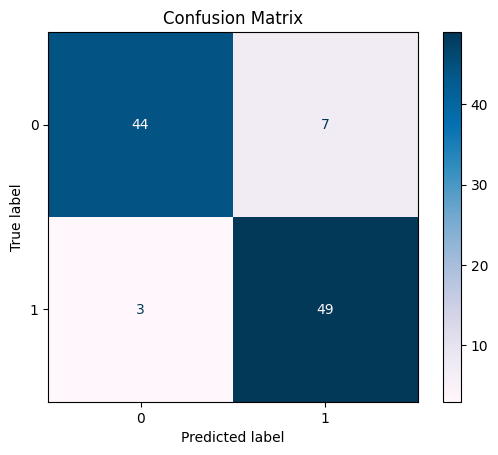

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

**GB Classifier implementation**

In [ ]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [ ]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test)

In [ ]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.883495145631068
GB Precision: 0.8225806451612904
GB Forest Recall: 0.9807692307692307
GB Forest F1 Score: 0.8947368421052632


In [ ]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[40, 11],
       [ 1, 51]])

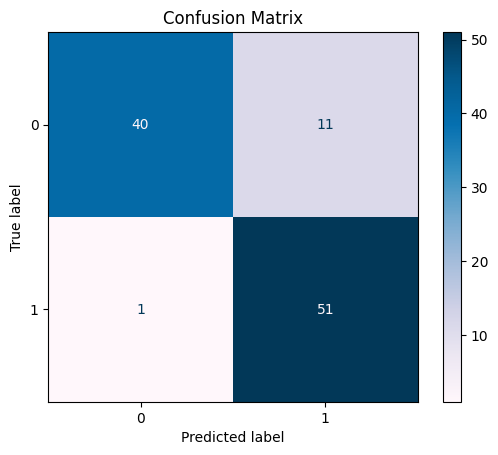

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# **Bootstrapping**

# RF

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

In [ ]:
n_bootstraps = 1000 # Number of bootstrap samples
accuracy = []

In [ ]:
for i in range(n_bootstraps):
    # Create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(x_test, y_test, replace=True)

    # Evaluate the model on the bootstrap sample
    y_pred_gb_bs =  classifier.predict(X_bootstrap)
    score_gb = accuracy_score(y_bootstrap, y_pred_gb_bs)
    accuracy.append(score_gb)

    # y_prob_rf = model.predict_proba(X_bootstrap)[:, 1]
    # rf_fpr, rf_tpr, thresholds = roc_curve(y_bootstrap, y_prob_rf)
    # roc_auc_rf = auc(rf_fpr, rf_tpr)
    # accuracy.append(roc_auc_rf)

In [ ]:
# Calculate statistics of bootstrap scores
mean_score = np.mean(accuracy)
std_score = np.std(accuracy, ddof=1)
conf_interval = np.percentile(accuracy, [2.5, 97.5])
std_error = std_score / np.sqrt(n_bootstraps)

In [ ]:
print(f'Mean Accuracy: {mean_score * 100:.2f}%')
print(f'Standard Deviation: {std_score * 100:.2f}%')
print(f'95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]')
print(f'Standard Error: {std_error:.4f}')

Mean Accuracy: 83.47%
Standard Deviation: 3.63%
95% Confidence Interval: [0.77, 0.90]
Standard Error: 0.0011


In [ ]:
# Another try
# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n"
      f"Mean accuracy is {mean_score:.4f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}]. And Standard Deviation: {std_score:.4f}")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Mean accuracy is 0.8347 with a 95% a confidence interval of [0.77,0.90]. And Standard Deviation: 0.0363


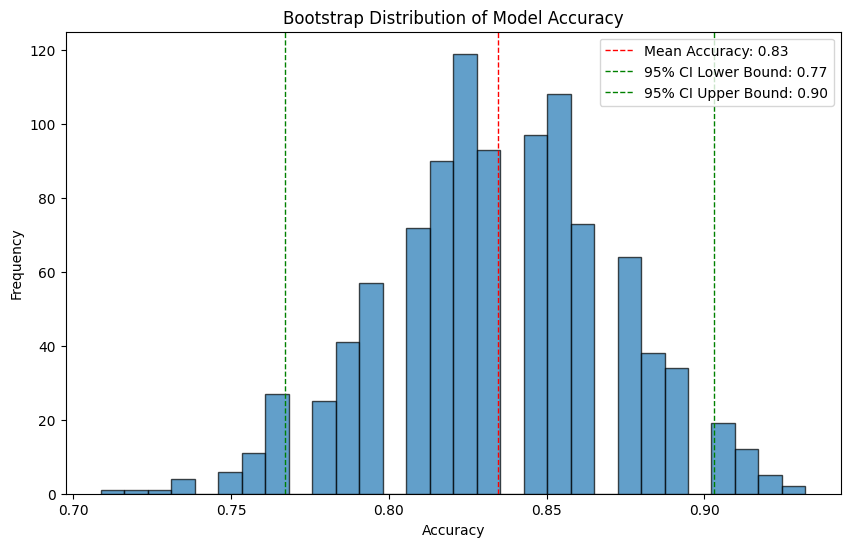

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(accuracy, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_score, color='r', linestyle='dashed', linewidth=1, label=f'Mean Accuracy: {mean_score:.2f}')
plt.axvline(conf_interval[0], color='g', linestyle='dashed', linewidth=1, label=f'95% CI Lower Bound: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='g', linestyle='dashed', linewidth=1, label=f'95% CI Upper Bound: {conf_interval[1]:.2f}')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Model Accuracy')
plt.legend()
plt.show()

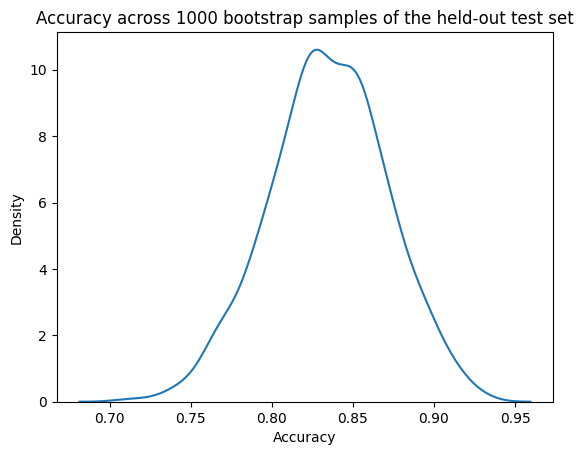

In [ ]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [ ]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples "
      f"were used to calculate 95% confidence intervals.\n\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence"
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.

Median accuracy is 0.83 with a 95% a confidenceinterval of [0.77,0.90].


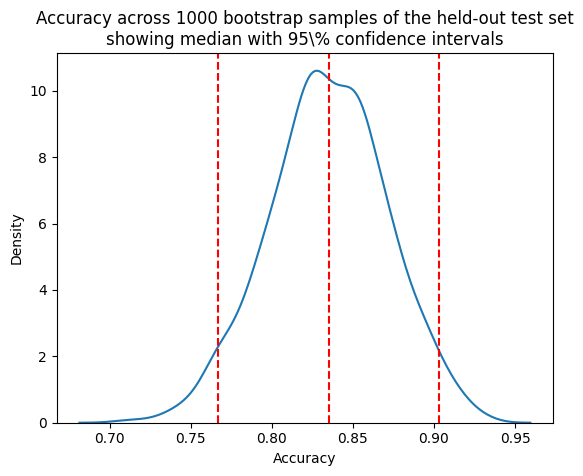

In [ ]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

In [ ]:

# Define the models
# models = {
#     'Random Forest': rf_clf,
#     'Decision Tree': dc_clf,
#     # 'Naive Bayes': GaussianNB(),
#     # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     # 'MLP': MLPClassifier(max_iter=1000),
#     # 'Logistic Regression': model2,
#     # 'SVM': SVC(),
#     # 'KNN': KNeighborsClassifier(),
#     # 'Gradient Boosting': GradientBoostingClassifier()
# }

# # Function to perform bootstrapping
# def bootstrap_evaluation(x, y, n_iterations=30, test_size=0.1):
#     results = {model_name: [] for model_name in models.keys()}

#     for i in range(n_iterations):
#         # Generate bootstrapped dataset
#         X_resampled, y_resampled = resample(x, y, replace=True)
#         X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size)

#         for model_name, model in models.items():
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             accuracy = accuracy_score(y_test, y_pred)
#             results[model_name].append(accuracy)

#     # Calculate mean, std, and CI for each model
#     for model_name in results.keys():
#         accuracies = results[model_name]
#         mean_accuracy = np.mean(accuracies)
#         std_accuracy = np.std(accuracies)
#         ci_lower = mean_accuracy - 1.96 * (std_accuracy / np.sqrt(n_iterations))
#         ci_upper = mean_accuracy + 1.96 * (std_accuracy / np.sqrt(n_iterations))
#         print(f'{model_name}: Mean Accuracy = {mean_accuracy:.4f}, Std Dev = {std_accuracy:.4f}, 95% CI = ({ci_lower:.4f}, {ci_upper:.4f})')

# # Perform bootstrapping evaluation with reduced iterations
# bootstrap_evaluation(x, y)
